<a href="https://colab.research.google.com/github/ogkaza/Collab_v4/blob/main/Laba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB
Файл успешно сохранился в сессионное хранилище!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

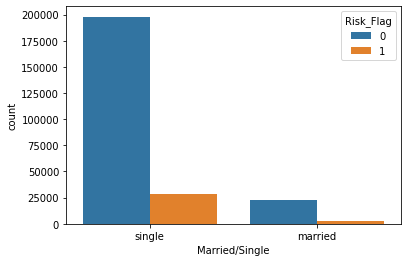

In [5]:
from google.colab import files
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


train = pd.read_csv('/content/Training Data.csv')
train.head(3)

test = pd.read_csv('/content/Test Data.csv')
test.head(3)

sns.countplot(x = 'Married/Single', hue = 'Risk_Flag', data = train)

#train.isnull().sum()

houseOwnership = pd.get_dummies(train['House_Ownership'], drop_first = True)
marriedSingle = pd.get_dummies(train['Married/Single'], drop_first = True)
carOwnership = pd.get_dummies(train['Car_Ownership'], drop_first = True)
train = pd.concat([train, houseOwnership, marriedSingle, carOwnership],axis = 1)
train.drop(['House_Ownership', 'Married/Single', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Id', 'Experience'], axis = 1, inplace = True)


scaler = StandardScaler()
cols_to_scale = ['Income', 'Age', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
scaler.fit(train[cols_to_scale])
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

X_train = train.drop('Risk_Flag', axis = 1)
y_train = train['Risk_Flag']

model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()

y_pred_train = model.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз рисковано', 'Прогноз не рисковано'], index = ['Факт рисковано', 'Факт не рисковано'])
conf_matrix_labels

model_accuracy = accuracy_score(y_train, y_pred_train)
round(model_accuracy, 3)


#///////////////////////////////////////////////////////////////////////////////////////////////////
test.info()
X_test = test

houseOwnership = pd.get_dummies(X_test['House_Ownership'], drop_first = True)
marriedSingle = pd.get_dummies(X_test['Married/Single'], drop_first = True)
carOwnership = pd.get_dummies(X_test['Car_Ownership'], drop_first = True)

X_test = pd.concat([test, houseOwnership, marriedSingle, carOwnership], axis = 1)
X_test.drop(['House_Ownership', 'Married/Single', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'ID', 'Experience'], axis = 1, inplace = True)

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_test.head(3)

X_test.columns = X_test.columns.map(str)
y_pred_test = model.predict(X_test)
y_pred_test[:10]

ids = test['ID']
result = pd.DataFrame({'ID': ids, 'Risk_Flag': y_pred_test})
result.head(10)

result.to_csv('result.csv', index = False)
print('Файл успешно сохранился в сессионное хранилище!')
files.download('/content/result.csv')